# Computational applications of Matrix Theory

### <span style="color:blue"> Module III:??</span>

### Readings for this topic

 * Revise lecture notes 2-7

[Link to this document's Jupyter Notebook](04-Gauss_Jordan_in-class-assignment.ipynb)?

### Goals for today's pre-class assignment 

1. [Sympy RREF function](#Sympy-RREF-function)
2. [Calculating Vector Length, Normalization, Distance and Dot](#Calculating-Vector-Length,-Normalization,-Distance-and-Dot)
3. [Vector spaces in $\mathbb{C}_n$](#Vector-spaces-in-Rn)
4. [Basis Vectors](#Basis_Vectors)
5. [Lots of Things Can Be Vector Spaces](#Examples)
6. [Introduction to subspaces](#Introduction-to-subspaces)
7. [(30 minutes) Matrix Representation of Vector Spaces](#Matrix_Representation_of_Vector_Spaces)
8. [Properties of Invertible Matrices](#Properties_of_invertible_Matrices)
9.  [The Basis of a Vector Space](#The_Basis_of_a_Vector_Space)
10.   [Change of Basis](#Change_of_Basis)
1. [Assignment Wrap-up](#Assignment_Wrap-up)

In [20]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()



---
<a name=Solving-Systems-of-Linear-Equations></a>
## A1. Solving Systems of Linear Equations


Remember the following set of equations from the mass weight example:

<img src="https://lh4.googleusercontent.com/48AcnVEBkzXJ_heu4fR0DbP5BBunyRlzPsTeK8WSBsMTSjZ5QNhdhtnVsdAw7wD0NBITIiSmh9Jn0gTPABkxqDa-LrhRicZGdpfbYakgWjJetZfOPk636Eu-vjmj=w740" align="center" width="70%" alt="Image showing two balanced beams, each with three weights. In the top beam is unknown weight A is a distance of 40 to the left of the fulcrum, unknown weight B is a distance of 15 to the left of the fulcrum and a weight of 2 is 50 to the right of the fulcrum. In the bottom beam is the same unknown weights.  Weight A is now a distance of 50 to the right of the fulcrum, weight B is a distance of 25 to the left of the fulcrum and the weight of 2 is a distance of 25 to the right of the fulcrum.">
$$40A + 15B = 100$$
$$25B = 50 + 50A$$


As you know, the above system of equations can be written as an Augmented Matrix in the following form:


$$ 
\left[
\begin{matrix}
    40  & 15  \\
    -50 & 25  
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
100 \\ 50 
\end{matrix}
\right] 
$$



&#9989; **<font color=red>QUESTION:</font>**  Split apart the augmented matrix  ($ 
\left[
\begin{matrix}
    A
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
b
\end{matrix}
\right] 
$) into it's left size ($2 \times 2$) matrix $A$ and it's right ($2x1$) matrix $b$. Define the matrices $A$ and $b$ as ```numpy``` matrices:

In [21]:
#Put your code here
A = np.array([[40,15],
              [-50,25]])
b = np.array([[100],[50]])


In [22]:
from answercheck import checkanswer

checkanswer.matrix(A,'f5bfd7c52824d5ac580d0ce1ab98fe68');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 40.  15.]
 [-50.  25.]]
Answer seems to be correct



In [23]:
from answercheck import checkanswer

checkanswer.matrix(b,'c760cd470439f5db82bb165edf4dc3f8');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[100.]
 [ 50.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION:</font>**  solve the above system of equations using the ```np.linalg.solve``` function and store the value in a vector named x:

In [24]:
# Put your code to the above question here
x = np.linalg.solve(A,b)

In [25]:
from answercheck import checkanswer

checkanswer.vector(x,'fc02fe6d0577c4452ee70252e1e17654');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to a column vector using ```A = A.T```.

Testing [[1. 4.]]
Answer seems to be correct





---
<a name=Underdetermined-Systems></a>
## A2. Underdetermined Systems




Sometimes we have systems of linear equations where we have more unknowns than equations, in this case we call the system "underdetermined." These types of systems can have infinite solutions.  i.e., we can not find an unique $x$ such that $Ax=b$. In this case, we can find a set of equations that represent all of the solutions that solve the problem by using Gauss Jordan and the Reduced Row Echelon form. Lets consider the following example:


$$\begin{bmatrix}5&-2&2 & 1 \\ 4 & -3 &4 &2  \\ 4& -6 &7  & 4\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$



&#9989; **<font color=red>QUESTION</font>** Define an augmented matrix $M$ that represents the above system of equations:

In [26]:
#Put your code here
M = np.array([
              [5 ,-2, 2, 1, 1],
              [4 ,-3, 4, 2, 2],
              [4, -6, 7, 4, 3]
            ])

In [27]:
from answercheck import checkanswer

checkanswer.matrix(M,'efb9b2da0e44984a18f595d7892980e2');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 5. -2.  2.  1.  1.]
 [ 4. -3.  4.  2.  2.]
 [ 4. -6.  7.  4.  3.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** What is the Reduced Row Echelon form for A?

In [28]:
# Put your answer to the above question here
A  = sym.Matrix(M)
RREF,pivote  = A.rref()

In [29]:
from answercheck import checkanswer

checkanswer.matrix(RREF,'f1fa8baac1df4c378db20cff9e91ca5b');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.      -0.06667  0.06667]
 [ 0.       1.       0.      -0.4      0.4    ]
 [ 0.       0.       1.       0.26667  0.73333]]
Answer seems to be correct



Notice how the above RREF form of matrix A is different from what we have seen in the past.  In this case not all of our values for $x$ are unique. When we write down a solution to this problem by defining the variables by one or more of the undefined variables.  for example, here we can see that $x_4$ is undefined.  So we say $x_4 = x_4$, i.e. $x_4$ can be any number we want.  Then we can define $x_3$ in terms of $x_4$.  In this case $x_3 = \frac{11}{15} - \frac{4}{15}x_4$.  The entire solution can be written out as follows:

$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}x_4 \\
x_2 &= \frac{2}{5} + \frac{2}{5}x_4 \\
x_3 &= \frac{11}{15} - \frac{4}{15}x_4 \\
x_4 &= x_4 
\end{align*}
$$

&#9989; **<font color=red>DO THIS</font>** Review the above answer and make sure you understand how we get this answer from the Reduced Row Echelon form from above. 

Sometimes, in an effort to make the solution more clear, we introduce new variables (typically, $r,s,t$) and substitute them in for our undefined variables so the solution would look like the following:


$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}r \\
x_2 &= \frac{2}{5} + \frac{2}{5}r \\
x_3 &= \frac{11}{15} - \frac{4}{15}r \\
x_4 &= r 
\end{align*}
$$

We can find a particular solution to the above problem by inputing any number for $r$.  For example, set r equal to zero and create a vector for all of the $x$ values.


$$
\begin{align*} 
x_1 &= \frac{1}{15}\\
x_2 &= \frac{2}{5}\\
x_3 &= \frac{11}{15}  \\
x_4 &= 0
\end{align*}
$$

In [30]:
##here is the same basic math in python

r = 0
x = np.matrix([1/15+1/15*r, 2/5+2/5*r, 11/15-4/15*r, r]).T
x

matrix([[0.06666667],
        [0.4       ],
        [0.73333333],
        [0.        ]])

&#9989; **<font color=red>DO THIS</font>** Define two more matrixes $A$, $b$ representing the above system of equations $Ax=b$:

In [31]:
# put your answer to the above question here.
A = np.matrix(
    [
        [1, 0, 0,-1/15],
        [0, 1, 0,-2/5],
        [0, 0, 1, 4/15],
        [0, 0, 0, 1]
    ]
)

b = np.matrix([1/15,2/5,11/15,r]).T

In [32]:
from answercheck import checkanswer

checkanswer.matrix(A,'a600d0416a3fb9b4bde87b08caf068f1');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.      -0.06667]
 [ 0.       1.       0.      -0.4    ]
 [ 0.       0.       1.       0.26667]
 [ 0.       0.       0.       1.     ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 970c457cd2ffb65d12fb98f60f78ebf9

In [33]:
from answercheck import checkanswer

checkanswer.vector(b,'4cfaa788e4dd6de04fdf6aea4a0e0e71');


    Trying to convert to a column vector using ```A = A.T```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0.06667 0.4     0.73333 0.     ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect f1a67a410e3dd686355a54aad11de09f

Now let us check our answer by multipying matrix $A$ by our solution $x$ and see if we get $b$

In [34]:
np.allclose(A*x,b)

True

&#9989; **<font color=red>DO THIS</font>** Now go back and pick a different value for $r$ and see that it also produces a valid solution for $Ax=b$.

In [35]:
r = 5
x = np.matrix([1/15+1/15*r, 2/5+2/5*r, 11/15-4/15*r, r]).T
x

matrix([[ 0.4],
        [ 2.4],
        [-0.6],
        [ 5. ]])

In [36]:
A = np.matrix(
    [
        [1, 0, 0,-1/15],
        [0, 1, 0,-2/5],
        [0, 0, 1, 4/15],
        [0, 0, 0, 1]
    ]
)

b = np.matrix([1/15,2/5,11/15,r]).T


In [37]:
np.allclose(A*x,b)

True


---
<a name=Practice---Curve-Fitting-Example></a>
## A3. Practice   Curve Fitting Example

Consider the following polynomial with constant scalars $a$, $b$, and $c$, that falls on the $xy$-plane:

$$f(x) = ax^2 + bx + c$$


&#9989; **<font color=red>QUESTION:</font>**  Is this function linear? Why or why not?

Put your answer to the above question here.
The Function is linear if

$
    1. f(x+y) = f(x) + f(y)
$

$
    2. f(ax) = af(x)
$
There fore $$f(x) = ax^2 + bx + c$$ is not linear

Assume that we do not know the values of $a$, $b$ and $c$, but we do know that the points (1,2), (-1,12), and (2,3) are on the polynomial. We can substitute the known points into the equation above. For example, using point (1,2) we get the following equation:

$$2 = a1^2 + b1 + c$$
$$\text{or}$$
$$2 = a + b + c$$

&#9989; **<font color=red>QUESTION:</font>**  Generate two more equations by substituting points (-1,12) and (2,3) into the above equation:

&#9989; **<font color=red>Answer:</font>** 
1. $ a-b+c = 12 $
2. $ 4a+2b+c = 3 $ 

&#9989; **<font color=red>QUESTION:</font>**  If we did this right, we should have three equations and three unknowns ($a,b,c$).  Note also that these equations are linear (how did that happen?).  Transform this system of equations into two matrices $A$ and $b$ like we did above.

&#9989; **<font color=red>Answer:</font>**

In [54]:
A = np.matrix(
    [
        [1, 1, 1],
        [1, -1, 1],
        [4, 2, 1]
    ]
)
b = np.matrix([2, 12 ,3]).T

from answercheck import checkanswer

checkanswer.matrix(A,'1896041ded9eebf1cba7e04f32dd1069');

In [55]:
from answercheck import checkanswer

checkanswer.matrix(b,'01e594bb535b4e2f5a04758ff567f918');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 2.]
 [12.]
 [ 3.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** Write the code to solve for $x$ (i.e., ($a,b,c$)) using ```numpy```.

&#9989; **<font color=red>Answer:</font>**

In [56]:
#Put your answer to the above question here.
x = np.linalg.solve(A,b)

In [57]:
from answercheck import checkanswer

checkanswer.vector(x,'1dab22f81c2c156e6adca8ea7ee35dd7');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[ 2. -5.  5.]]
Answer seems to be correct



&#9989; **<font color=red>QUESTION</font>** Given the value of your ```x``` matrix derived in the previous question, what are the values for $a$, $b$, and $c$?

In [58]:
#Put your answer to the above question here.
a = 2
b = -5
c = 5

Assuming the above is correct, the following code will print your 2nd order polynomial and plot the original points:

Text(0, 0.5, 'y-axis')

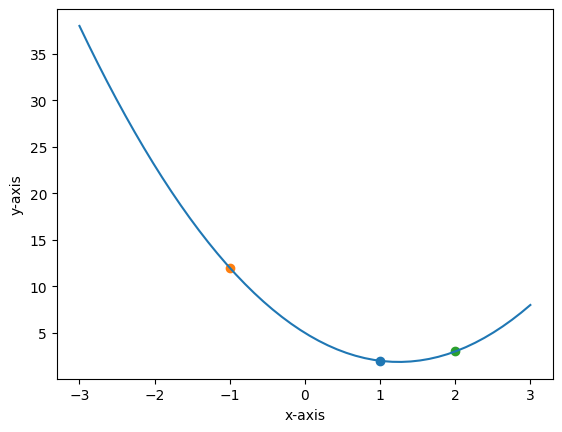

In [59]:
x = np.linspace(-3,3)
y = a*x**2 + b*x + c

#plot the function. (Transpose is needed to make the data line up).
plt.plot(x,y.transpose())

#Plot the original points
plt.scatter(1, 2)
plt.scatter(-1, 12)
plt.scatter(2, 3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')


&#9989; **<font color=red>QUESTION</font>** The following program is intended to take four points as inputs ($p1, p2, p3, p4 \in R^2$) and calculate the coefficients $a$, $b$, $c$, and $d$ so that the graph of $f(x) = ax^3 + bx^2 + cx + d$ passes smoothly through the points.  Test the function with the following points (1,2), (-1,6), (2,3), (3,2) as inputs and print the values for $a$, $b$, $c$, and $d$.

In [60]:
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T
    X = np.linalg.solve(A, b)
    a = X[0]
    b = X[1]
    c = X[2]
    d = X[3]
    #Try to put your figure generation code here for the next question 
    #####Start your code here #####
    #####End of your code here#####       
    return (a,b,c,d)

In [61]:
#put your answer to the above question here
p1,p2,p3,p4 = [1,2],[-1,6],[2,3],[3,2]
coef_np = fitPoly3(p1,p2,p3,p4)
print(coef_np)

(matrix([[-0.5]]), matrix([[2.]]), matrix([[-1.5]]), matrix([[2.]]))


&#9989; **<font color=red>QUESTION</font>** Modify the above ```fitpoly3``` function to also generate a figure of the input points and the resulting polynomial in range ```x=(-3,3)```. 

(matrix([[-0.5]]), matrix([[2.]]), matrix([[-1.5]]), matrix([[2.]]))

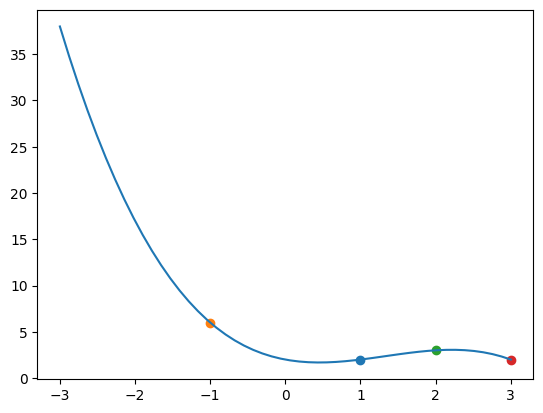

In [62]:
# Put the answer to the above question above or copy and paste the above function and modify it in this cell. 
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    X = np.linalg.solve(A, b)
    a = X[0]
    b = X[1]
    c = X[2]
    d = X[3]
    #Try to put your figure generation code here for the next question 
    #####Start your code here #####
    x = np.linspace(-3,3)
    y = a*x**3 + b*x**2 + c*x + d 
    plt.plot(x,y.transpose())
    plt.scatter(1,2)
    plt.scatter(-1,6)
    plt.scatter(2,3)
    plt.scatter(3,2)
    plt.plot()
    #####End of your code here#####       
    return (a,b,c,d)
fitPoly3(p1,p2,p3,p4)

&#9989; **<font color=red>QUESTION</font>** Give any four $R^2$ input points to ```fitPoly3```, is there always a unique solution?  Explain your answer. 

Put your answer to the above question here.

The Type of solution depends in the Input points. 
if the input vectors are dependent then the Soultion of the system of equations will be different 

# 05 Pre-Class Assignment

In [63]:
#  Load Useful Python Libraries 
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

---
<a name=Calculating-Vector-Length,-Normalization,-Distance-and-Dot></a>
## B1. Calculating Vector Length, Normalization, Distance and Dot

In this section we will cover some of the basic vector math we will use in this course. 


### Vectors:
$$(a_1, a_2, \dots a_n)$$

$$(b_1, b_2, \dots b_n)$$

### Length:
$$length = \sqrt{a_1^2 + a_2^2 + \dots + a_n^2}$$

### Normalization:
$$\frac{1}{length}(a_1, a_2, \dots a_n)$$

### Distance:
$$distance = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \dots + (a_n - b_n)^2}$$

&#9989;**<font color=red>QUESTION</font>**:   Calculate length of vector (4.5, 2.6, 3.3, 4.1)?

In [67]:
#Put your answer to the above question here
x = np.matrix([4.5, 2.6, 3.3 , 4.1]).T
length = np.linalg.norm(x)

In [68]:
from answercheck import checkanswer

checkanswer.float(length,'695da96d4a240e54bd8c61e75ff5a3e2');


    Trying to convert to a float using ```A = float(A)```.

Testing 7.39662
Answer seems to be correct



&#9989;**<font color=red>QUESTION</font>**: What is a normalized form of the vector (4.5, 2.6, 3.3, 4.1)?

In [69]:
#Put your answer to the above question here
norm = x*(1/length)

In [70]:
from answercheck import checkanswer

checkanswer.vector(norm,'12c94f16ba11222987ca20006790182d');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[0.60839 0.35151 0.44615 0.55431]]
Answer seems to be correct



&#9989;**<font color=red>QUESTION</font>**:  What is the distance between (4.5, 2.6, 3.3, 4.1) and (4, 3, 2, 1)?

In [71]:
#Put your answer to the above question here
#len x - y
x = np.matrix([4.5,2.6,3.3,4.1]).T
y = np.matrix([4,3,2,1]).T
distance = np.linalg.norm(x-y)

In [72]:
from answercheck import checkanswer

checkanswer.float(distance,'d73defc9a514eb70434190e1757f5bb8');


    Trying to convert to a float using ```A = float(A)```.

Testing 3.42199
Answer seems to be correct



### Dot Product:


$$dot(a,b) = a_1b_1 + a_2b_2 +\dots + a_nb_n$$




&#9989;**<font color=red>DO THIS</font>**:  Review **_Sections 1.4 and 1.5 of the Boyd and Vandenberghe_** text and answer the questions below.

&#9989;**<font color=red>QUESTION</font>**:   What is the dot product between $u = [ 1, 7, 9, 11]$ and $v = [ 7, 1, 2, 2]$  (Store the information in a variable called ```uv```)?

In [80]:
#Put your answer to the above question here
u = np.array([1,7,9,11])
v = np.array([7,1,2,2])
#54 
uv = np.dot(u,v)


In [81]:
from answercheck import checkanswer

checkanswer.float(uv,'48044bf058c2d7d21b311b173a0ca7e5');


    Trying to convert to a float using ```A = float(A)```.

Testing 54.0
Answer seems to be correct



&#9989;**<font color=red>QUESTION</font>**:  What is the norm of vector $u$ defined above (store this value in a variabled called ```n```)?

In [92]:
#Put your answer to the above question here
n= np.linalg.norm(u)


In [93]:
from answercheck import checkanswer

checkanswer.float(n,'96078eb552924d7bdb9e67f9ecab88c1');


    Trying to convert to a float using ```A = float(A)```.

Testing 15.87451
Answer seems to be correct



&#9989;**<font color=red>QUESTION</font>**:  What is the distance between points $u$ and $v$ defined above. (put your answer in a variable named ```d```)

In [96]:
#Put your answer to the above question here
d = np.linalg.norm(u-v)

In [97]:
from answercheck import checkanswer

checkanswer.float(d,'71f49beeb28061bc60eb3d9966497416');


    Trying to convert to a float using ```A = float(A)```.

Testing 14.21267
Answer seems to be correct





---
<a name=Vector-spaces-in-Rn></a>
## B2. Vector spaces in $\mathbb{C}^n$


There are two properties that define a vector space these are:

- Closed under addition
- Closed under scalar multiplication 

For now, we will consider vector spaces in $\mathbb{C}^n$ which are just vectors of real numbers (ex: [10,20,3.2], [5,8,32], [8,-0.7], etc) where $n$ is just the length of the vector. In the general case a vector can be almost any type of object as long as it maintains the two above properties, we will get into this concept later in the semester. For complex number the above concepts can be described as follows:

- Closed under addition means that if we add any two real vectors vectors (i.e. $u,v \in \mathbb{C}^n$) then the result is also in $\mathbb{C}^n$). This is easy to understand if you think about adding any two real vectors there is no way to get a result that is not also a real vector. A way to say this mathematically is as follows:

$$\text{if } u,v \in \mathbb{C}^n$$
$$\text{then } u+v \in \mathbb{C}^n$$

- Closed under scalar multiplication means that if we have any scalar number ($s \in \mathbb{C}$) and we multiply it by a real vector ($v \in \mathbb{C}^n$) then the result is also a vector in $\mathbb{C}^n$.  Since multiplying a real number by a real number results in a real number this one is also true. Or we can say it as follows:

$$\text{if } s \in \mathbb{C} \text{ and } v \in \mathbb{C}^n$$
$$\text{then } sv \in \mathbb{C}^n$$

The following are some properties of vector addition and multiplication for vectors $u$ and $v$:

1. $u + v = v + u$ Commutative property
2. $u + (v + w) = (u + v) + w$ Associative property
3. $u+0 = 0 + u = u$ Property of zero vector
4. $u + (-u) = 0$ Property of the negative vector
5. $c(u+v) = cu + cv$ Distributive properties
6. $(c+d)u = cu+du$ Distributive Properties
7. $c(du) = (cd)u$ Distributed Properties
8. $1u = u$ Scalar multiplication by 1

&#9989;**<font color=red>QUESTION</font>**: Compute the following linear combinations for $u = (1,2), v = (4,-1)$, and $w = (-3,5)$.

**<font color=red>(a)</font>** $a = u+w$        

Put your answer here

In [98]:
u = np.array([1,2])
v = np.array([4,-1])
w = np.array([-3,5])
a = u + w

In [99]:
from answercheck import checkanswer

checkanswer.vector(a,'af464d466ae982f2cd4461af494e86d6');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[-2.  7.]]
Answer seems to be correct



**<font color=red>(b)</font>** $a = 2u+v$        

Put your answer here

In [100]:
a = 2*u + v

In [101]:
from answercheck import checkanswer

checkanswer.vector(a,'393468eff8c6ba5d27b7d0aa1b18f929');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[6. 3.]]
Answer seems to be correct



**<font color=red>(c)</font>** $a = u+3w$        

Put your answer here

In [102]:
a = u + 3*w

In [103]:
from answercheck import checkanswer

checkanswer.vector(a,'d5e5ca43a86501bcde09b1cbc0ba49b5');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[-8. 17.]]
Answer seems to be correct



&#9989; <font color=red>**Assignment-Specific QUESTION:**</font> What is the distance between (4.5, 2.6, 3.3, 4.1) and (4, 3, 2, 1)?

Put your answer to the above question here

In [105]:
x = np.array([4.5,2.6,3.3,4.1])
y = np.array([4,3,2,1])
distance = np.linalg.norm(x-y)
distance

&#9989; <font color=red>**QUESTION:**</font>  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

&#9989; <font color=red>**QUESTION:**</font>  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

# C: Vector Spaces

----
<a name="Basis_Vectors"></a>
## C1. Basis Vectors

Below is a really good review of concepts such as: Linear combinatins, span, and basis vectors. 

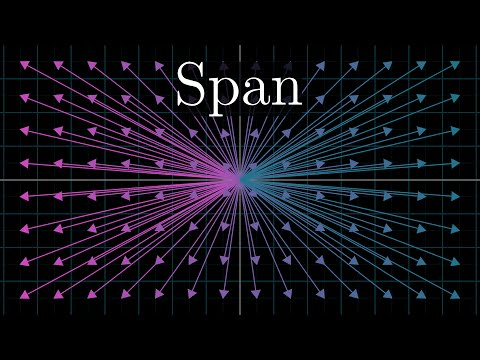

In [106]:
from IPython.display import YouTubeVideo
YouTubeVideo("k7RM-ot2NWY",width=640,height=360, cc_load_policy=True)

&#9989; **<font color=red>QUESTION:</font>** What is the **technical definition** of a basis?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Write three basis vectors that span $R^3$.


Put your answer to the above question here

From the above video two terms we want you to really understand _**Span**_ and **_Linear Independent_**. Understanding these two will be really important when you think about basis.  Make sure you watch the video and try to answer the following questions as best you can using your own words.  

&#9989; **<font color=red>QUESTION:</font>** Describe what it means for vectors to _**Span**_ a space?


Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What is the span of two vectors that point in the same direction?


Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Can the following vectors span $R^3$? Why?

$(1,-2,3),\quad (-2,4,-6),\quad (0,6,4)$

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Describe what it means for vectors to be _**Linearly Independent**_?

Put your answer to the above question here

If you have vectors that _**span**_ a space AND are _**Linearly Independent**_ then these vectors form a **_Basis_** for that space.  


Turns out you can create a matrix by using basis vectors as columns. This matrix can be used to change points from one basis representation to another.  

----

<a name="Vector_Spaces"></a>
## C2.  Vector Spaces

Vector spaces are an abstract concept used in math. So far we have talked about vectors of real numbers ($R^n$). However, there are other types of vectors as well.  A vector space is a formal definition. If you can define a concept as a vector space then you can use the tools of linear algebra to work with those concepts.  

A **Vector Space** is a set $V$ of elements called **vectors**, having operations of addition and scalar multiplication defined on it that satisfy the following conditions ($u$, $v$, and $w$ are arbitrary elements of $V$, and $c$ and $d$ are scalars.)

### Closure Axioms

1. The sum $u + v$ exists and is an element of $V$. ($V$ is closed under addition.)
2. $cu$ is an element of $V$. ($V$ is closed under multiplication.)

### Addition Axioms

3. $u + v = v + u$ (commutative property)
4. $u + (v + w) = (u + v) + w$ (associative property)
5. There exists an element of $V$, called a **zero vector**, denoted $0$, such that $u+0 = u$
6. For every element $u$ of $V$, there exists an element called a **negative** of $u$, denoted $-u$, such that $u + (-u) = 0$.

### Scalar Multiplication Axioms

7. $c(u+v) = cu + cv$
8. $(c + d)u = cu + du$
9.  $c(du) = (cd)u$
10. $1u = u$



----
<a name="Examples"></a>
## C3. Lots of Things Can Be Vector Spaces

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("YmGWj9RrNMI",width=640,height=360, cc_load_policy=True)

Consider the following two matrices $A\in R^{3x3}$ and $B\in R^{3x3}$, which consist of real numbers:

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

a11,a12,a13,a21,a22,a23,a31,a32,a33 = sym.symbols('a_{11},a_{12}, a_{13},a_{21},a_{22},a_{23},a_{31},a_{32},a_{33}', negative=False)
A = sym.Matrix([[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]])
A

In [ ]:
b11,b12,b13,b21,b22,b23,b31,b32,b33 = sym.symbols('b_{11},b_{12}, b_{13},b_{21},b_{22},b_{23},b_{31},b_{32},b_{33}', negative=False)
B = sym.Matrix([[b11,b12,b13],[b21,b22,b23],[b31,b32,b33]])
B

&#9989; **<font color=red>QUESTION:</font>** What properties do we need to show all $3\times 3$ matrices of real numbers form a vector space. 

Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Demonstrate these properties using **sympy** as was done in the video. 

In [ ]:
#Put your answer here. 

&#9989; **<font color=red>QUESTION :</font>** Determine whether $A$ is a linear combination of $B$, $C$, and $D$?

$$ A=
\left[
\begin{matrix}
    7 & 6 \\
    -5 & -3 
\end{matrix}
\right],
B=
\left[
\begin{matrix}
    3 & 0 \\
    1 & 1 
\end{matrix}
\right],
C=
\left[
\begin{matrix}
    0 & 1 \\
    3 & 4 
\end{matrix}
\right],
D=
\left[
\begin{matrix}
    1 & 2 \\
    0 & 1 
\end{matrix}
\right]
$$

In [ ]:
#Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Write a basis for all $2\times 3$ matrices and give the dimension of the space.

Put your answer to the above question here.

&#9989; **<font color=red> QUESTION:</font>** Is matrix $A$ is a linear combination of $B$, $C$, and $D$ from above?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

# D: Vector Spaces

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/3d_basis_transformation.svg/580px-3d_basis_transformation.svg.png" width="50%">

Image from: [https://en.wikipedia.org/wiki/Change_of_basis](https://en.wikipedia.org/wiki/Change_of_basis)



    

# ---
<a name=Basis-Vectors></a>
## D1. Basis Vectors



Consider the following example. We claim that the following set of vectors form a baiss for $R^3$:

$$B = \{(2,1, 3), (-1,6, 0), (3, 4, -10) \}$$

If these vectors form a basis they must be _**linearly independent**_ and _**Span**_ the entire space of $R^3$

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

&#9989; **<font color=red>DO THIS:</font>** Create a $3 \times 3$ numpy matrix $A$ where the columns of $A$ form are the basis vectors. 

In [ ]:
#Put your answer to the above question here

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(A,'68b81f1c1041158b519936cb1a2e4d6b');

&#9989; **<font color=red>DO THIS:</font>** Using python, calculate the determinant of matrix $A$.

In [ ]:
# Put your answer to the above question here. 

&#9989; **<font color=red>DO THIS:</font>** Using python, calculate the inverse of $A$.

In [ ]:
# Put your answer to the above question here.

&#9989; **<font color=red>DO THIS:</font>** Using python, calculate the rank of $A$.

In [ ]:
# Put your answer to the above question here.

&#9989; **<font color=red>DO THIS:</font>** Using python, calculate the reduced row echelon form of $A$.

In [ ]:
# Put your answer to the above question here. 

&#9989; **<font color=red>DO THIS:</font>** Using the above $A$ and the vector $b=(1,3,2)$.  What is the solution to $Ax=b$?  

In [ ]:
#Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(x,'8b0938260dfeaafc9f8e9fec0bc72f17');

Turns out a matrix where column vectors are formed from basis vectors a lot of interesting properties and the following statements are equivalent.

- The column vectors of $A$ form a basis for $\mathbb{C}^n$
- $|A| \ne 0$
- $A$ is invertible.
- $A$ is row equivalent to $I_n$ (i.e. it's reduced row echelon form is $I_n$)
- The system of equations $Ax = b$ has a unique solution.
- $rank(A) = n$


Not all matrices follow the above statements but the ones that do are used throughout linear algebra so it is important that we know these properties. 



---
<a name=Vector-Spaces></a>
## D2. Vector Spaces

A **Vector Space** is a set $V$ of elements called **vectors**, having operations of addition and scalar multiplication defined on it that satisfy the following conditions ($u$, $v$, and $w$ are arbitrary elements of $V$, and c and d are scalars.)

### Closure Axioms

1. The sum $u + v$ exists and is an element of $V$. ($V$ is closed under addition.)
2. $cu$ is an element of $V$. ($V$ is closed under scalar multiplication.)

### Addition Axioms

3. $u + v = v + u$ (commutative property)
4. $u + (v + w) = (u + v) + w$ (associative property)
5. There exists an element of $V$, called a **zero vector**, denoted $0$, such that $u+0 = u$
6. For every element $u$ of $V$, there exists an element called a **negative** of $u$, denoted $-u$, such that $u + (-u) = 0$.

### Scalar Multiplication Axioms

7. $c(u+v) = cu + cv$
8. $(c + d)u = cu + du$
9.  $c(du) = (cd)u$
10. $1u = u$

### Definition of a basis of a vector space

> A finite set of vectors ${v_1,\dots, v_n}$ is called a **basis** of a *vector space* $V$ if the set *spans* $V$ and is *linearly independent*. 
>i.e. each vector in $V$ can be expressed uniquely as a *linear combination* of the vectors in a basis.



## Vector spaces

&#9989; **<font color=red>DO THIS:</font>** Let $U$ be the set of all circles in $R^2$ having center at the origin. 
Interpret the origin as being in this set, i.e., it is a circle center at the origin with radius zero. 
Assume $C_1$ and $C_2$ are elements of $U$. 
Let $C_1 + C_2$ be the circle centered at the origin, whose radius is the sum of the radii of $C_1$ and $C_2$. 
Let $kC_1$ be the circle center at the origin, whose radius is $|k|$ times that of $C_1$. 
Determine which vector space axioms hold and which do not. 


Put your answer here

### Spans:

&#9989; **<font color=red>DO THIS:</font>** Let $v$, $v_1$, and $v_2$ be vectors in a vector space $V$. 
Let $v$ be a linear combination of $v_1$ and $v_2$. 
If $c_1$ and $c_2$ are nonzero real numbers, show that $v$ is also a linear combination of $c_1v_1$ and $c_2v_2$.

Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Let $v_1$ and $v_2$ span a vector space $V$. 
Let $v_3$ be any other vector in $V$. 
Show that $v_1$, $v_2$, and $v_3$ also span $V$.

Put your answer here

### Linear Independent:
Consider the following matrix, which is in the reduced row echelon form.


$$ 
\left[
\begin{matrix}
    1   & 0 & 0 & 7  \\
    0   & 1 & 0 & 4  \\
    0   & 0 & 1 & 3
\end{matrix}
\right] 
$$

&#9989; **<font color=red>DO THIS:</font>** Show that the row vectors form a linearly independent set:


Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Is the set of nonzero row vectors of any matrix in reduced row echelon form linearly independent? Discuss in your groups and include your thoughts below.

Put your answer here

&#9989; **<font color=red>DO THIS:</font>** A computer program accepts a number of vectors in $R^3$ as input and checks to see if the vectors are linearly independent and outputs a True/False statment. 
Discuss in your groups, which is more likely to happen due to round-off error--that the computer states that a given set of linearly independent vectors is linearly dependent, or vice versa? 
Put your groups thoughts below.

Put your answer here

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

# E Matrix Spaces

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

----
<a name="Properties_of_invertible_Matrices"></a>

## E1.  Review the Properties of Invertible Matrices
Let $A$ be an $n \times n$ matrix. The following statements are equivalent.

- The column vectors of $A$ form a basis for $R^n$
- $|A| \ne 0$
- $A$ is invertible.
- $A$ is row equivalent to $I_n$ (i.e. it's reduced row echelon form is $I_n$)
- The system of equations $Ax = b$ has a unique solution.
- $rank(A) = n$


Consider the following example. We claim that the following set of vectors form a basis for $R^3$:

$$B = \{(2,1, 4), (-1,6, 0), (2, 4, -3) \}$$

Remember for these two vectors to be a basis they need to obay the following two properties:

1. They must span $R^3$. 
2. They must be linearly independent.

Using the above statements we can show this is true in multiple ways.  


### The column vectors of $A$ form a basis for $R^n$

&#9989; **<font color=red>DO THIS:</font>** Define a numpy matrix ```A``` consisting of the vectors $B$ as columns:

In [ ]:
#Put your answer to the above question here

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(A,'94827a40ec59c7d767afe6841e1723ce');

### $|A| \ne 0$


&#9989; **<font color=red>DO THIS:</font>** The first in the above properties tell us that if the vectors in $B$ are truly a basis of $R^3$ then $|A|=0$. Calculate the determinant of $A$ and store the value in ```det```.

In [ ]:
#Put your answer to the above question here

In [ ]:
#Verify that the determinate is in fact zero
if np.isclose(det,0):
    print("Since the Determinate is zero the column vectors do NOT form a Basis")
else:
    print("Since the Determinate is non-zero then the column vectors form a Basis.")

###  $A$ is invertible.


&#9989; **<font color=red>DO THIS:</font>** Since the determinant is non-zero we know that there is an inverse to A.  Use python to calculate that inverse and store it in a matrix called ```A_inv```

In [ ]:
#put your answer to the above question here

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(A_inv,'001aaddd4824f42ad9d2ccde21cf9d24');

### $A$ is row equivalent to $I_n$ (i.e. it's reduced row echelon form is $I_n$)


&#9989; **<font color=red>DO THIS:</font>** According to the property above the reduced row echelon form of an invertable matrix is the Identity matrix.  Verify using the python ```sympy``` library and store the reduced row echelone matrix in a variable called ```rref``` if you really need to check it.

In [ ]:
#put your answer to the above question here

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(rref,'cde432847c1c4b6d17cd7bfacc457ed1');

### The system of equations $Ax = b$ has a unique solution.

Let us assume some arbitrary vector $b \in R^n$.  According to the above properties it should only have one solution.

&#9989; **<font color=red>DO THIS:</font>** Find the solution to $Ax=b$ for the vector $b=(-10,200,3)$. Store the solution in a variable called ```x```

In [ ]:
from answercheck import checkanswer

checkanswer.vector(x,'161cfd16545b1b5fb13e35d2800f13df');

### $rank(A) = n$

The final property says that the rank should equal the dimension of $R^n$. In our example $n=3$.  Find a ```python``` function to calculate the rank of $A$. Store the value in a variable named ```rank``` to check your answer.


In [ ]:
#Put your answer to the above quesion here

In [ ]:
#Verify that the determinate is in fact zero
if np.isclose(rank,3):
    print("Rank is 3")
else:
    print("Rank is not 3. Did we do something wrong?")

&#9989; **<font color=red>QUESTION (assignment-specific):</font>** Without doing any calculations (i.e. only using the above properties), how many solutions are there to $Ax=0$?  What is(are) the solution(s)?

Put your answer to the above question here.

----
<a name="The_Basis_of_a_Vector_Space"></a>
## E2. The Basis of a Vector Space

Let $U$ be a vector space with basis $B=\{u_1, \ldots, u_n\}$, and let $u$ be a vector in $U$. 
Because a basis "spans" the vector space, we know that there exists scalars $a_1, \dots, a_n$ such that:

$$ u = a_1u_1 + \dots + a_nu_n$$

Since a basis is a linearly independent set of vectors we know the scalars $a_1, \dots, a_n$ are unique.

The values $a_1, \dots, a_n$ are called the **coordinates of $u$** relative to the basis ($B$) and is typically written as a column vector:

$$ u_B = 
\left[
\begin{matrix}
    a_1  \\
    \vdots  \\
    a_n 
 \end{matrix}
\right] 
$$

We can create a *transition matrix* $P$ using the inverse of the matrix with the basis vectors being columns. 

$$P = [ u_1  \ldots  u_n ]^{-1}$$

Now we will show that matrix $P$ will transition vector $u$ in the standard coordinate system to the coordinates relative to the basis $B$:

$$ u_B = Pu$$

**_EXAMPLE_**: Consider the vector $u = \left[ \begin{matrix} 5 \\ 3 \end{matrix} \right]$ and the basis vectors $B = \{(1,2), (3,-1)\}$. 
The following code calculates the $P$ *transition matrix* from $B$ and then uses $P$ to calculate the values of $u_B$ ($a_1$ and $a_2$):


In [ ]:
u = np.matrix([[5],[3]])
sym.Matrix(u)

In [ ]:
B = np.matrix([[1,2],[3,-1]]).T
sym.Matrix(B)

In [ ]:
P = np.linalg.inv(B)
ub = P*u

sym.Matrix(ub)

Here we would like to view this from $R^n$. 
Let $$B=[u_1 \dots u_n],$$
then the values of $u_B$ can be found by solving the linear system $$u = B u_B.$$
The columns of $B$ are a basis, therefore, the matrix $B$ is a $n\times n$ square matrix and it has an inverse. 
Therefore, we can solve the linear system and obtain 
$$u_B = B^{-1} u = Pu.$$


Let's try to visualize this with a plot:

In [ ]:
ax = plt.axes();


#Blue arrow representing first Basis Vector
ax.arrow(0, 0, B[0,0],B[1,0], head_width=.2, head_length=.2, fc='blue', ec='blue');


#Green arrow representing Second Basis Vector
plt.plot([0,B[0,1]],[0,B[1,1]],color='green'); #Need this line to make the figure work. Not sure why.
ax.arrow(0, 0, B[0,1],B[1,1], head_width=.2, head_length=.2, fc='green', ec='green');

#Original point u as a red dot
ax.scatter(u[0,0],u[1,0], color='red');

plt.show()
#plt.axis('equal');


Notice that the blue arrow represents the first basis vector and the green arrow is the second basis vector in $B$. 
The solution to $u_B$ shows 2 units along the blue vector and 1 units along the green vector, which puts us at the point (5,3). 

This is also called a change in coordinate systems.

&#9989; **<font color=red>QUESTION</font>**: What is the coordinate vector of $u$ relative to the given basis $B$ in $R^3$?

$$u = (9,-3,21)$$
$$B = \{(2,0,-1), (0,1,3), (1,1,1)\}$$

Store this coordinate in a variable ```ub``` for checking:

In [ ]:
#Put your answer here

In [ ]:
from answercheck import checkanswer

checkanswer.vector(ub,'f72f62c739096030e0074c4e1dfca159');

**_Let's look more closely into the matrix $P$, what is the meaning of the columns of the matrix $P$?_**

We know that $P$ is the inverse of $B$, therefore, we have $$BP=I.$$
Then we can look at the first column of the $P$, say $p_{1}$, we have that $Bp_1$ is the column vector $(1,0,0)^\top$, which  is exactly the first component from the standard basis. 
This is true for other columns. 

It means that if we want to change an old basis $B$ to a new basis $B'$, we need to find out all the coordinates in the new basis for the old basis, and the transition matrix is by putting all the coordinates as columns.

Here is the matrix $B$ again:

In [ ]:
B = np.matrix([[2,0,-1],[0,1,3],[1,1,1]]).T
sym.Matrix(B)

The first column of P should be the solution to $Bx=\left[ \begin{matrix} 1 \\ 0 \\ 0 \end{matrix} \right]$.  We can use the ```numpy.linalg.solve``` function to find this solution:

In [ ]:
# The first column of P should be 
u1 = np.matrix([1,0,0]).T
p1 = np.linalg.solve(B,u1)
p1

We can find a similar answer for columns $p_2$ and $p_3$:

In [ ]:
# The second column of P should be 
u2 = np.matrix([0,1,0]).T
p2 = np.linalg.solve(B,u2)
p2

In [ ]:
# The third column of P should be 
u3 = np.matrix([0,0,1]).T
p3 = np.linalg.solve(B,u3)
p3

In [ ]:
# concatenate three column together into a 3x3 matrix
P = np.concatenate((p1, p2, p3), axis=1)
sym.Matrix(P)

In [ ]:
# Find the new coordinate in the new basis
u = np.matrix([9,-3,21]).T
UB = P*u
print(UB)

This should be basically the same answer as you got above. 

----
<a name="Change_of_Basis"></a>

## E3. Change of Basis

Now consider the following two bases in $R^2$:

$$B_1 = \{(1,2), (3,-1)\}$$
$$B_2 = \{(3,1), (5,2)\}$$

The transformation from the "standard basis" to $B_1$ and $B_2$ can be defined as the column vectors $P_1$ and $P_2$ as follows:


In [ ]:
B1 = np.matrix([[1,2],[3,-1]]).T
P1 = np.linalg.inv(B1)

sym.Matrix(P1)

In [ ]:
B2 = np.matrix([[3,1],[5,2]]).T
P2 = np.linalg.inv(B2)

sym.Matrix(P2)

&#9989; **<font color=red>DO THIS</font>**: Find the transition matrix $T$ that will take points in the $B_1$ coordinate representation and put them into $B_2$ coordinates.  **_NOTE_** this is analogous to the robot kinematics problem.  We want to represent points in a different coordinate system.

In [ ]:
# Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(T,'dcc03ddff982e29eea6dd52ec9088986')


&#9989; **<font color=red>QUESTION</font>**: Given $u_{B_1} = \left[ \begin{matrix} 2 \\ 1 \end{matrix} \right]$ (a point named $u$ in the $B_1$ coordinate system) and your calculated transition matrix $T$, what is the same point expressed in the $B_2$ basis (i.e. what is $u_{B2}$)? Store your answer in a variable named ub2 for checking.

In [ ]:
ub1 = np.matrix([[2],[1]])
sym.Matrix(ub1)

In [ ]:
##Put your code here

In [ ]:
from answercheck import checkanswer

checkanswer.vector(ub2,'9a5fe29254c07cf59ebdffcaba679917')

There are three bases $B_1$, $B_2$, and $B_3$. We have the transition matrix $P_{12}$ from $B_1$ to $B_2$ and the transition matrix $P_{23}$ from $B_2$ to $B_3$. 
In $R^n$, we can compute the transition matrix as $$P_{12}=B_2^{-1}B_1,\quad P_{23}=B_3^{-1}B_2$$

Then we can find all other transition matrices.
$$P_{13} = B_3^{-1}B_1=B_3^{-1}B_2*B_2^{-1}B_1= P_{23}P_{12}$$
$$P_{21} = B_1^{-1}B_2 = (B_2^{-1}B_1)^{-1}=P_{12}^{-1}$$
$$P_{32} = B_2^{-1}B_3 = (B_3^{-1}B_2)^{-1}=P_{23}^{-1}$$
$$P_{31} = B_1^{-1}B_3 = (B_3^{-1}B_1)^{-1}=P_{13}^{-1}=(P_{23}P_{12})^{-1}=P_{12}^{-1}P_{23}^{-1}$$

The result is true for general vector spaces and can be extended to many bases.

----

<a name="Assignment_wrap-up"></a>
## E4. Assignment wrap-up

&#9989; **<font color=red> QUESTION:</font>** Without doing any calculations (i.e. only using the above properties), how many solutions are there to Ax=0? What is(are) the solution(s)?

Put your answer to the above question here

# F Matrix Representation

<img alt="Alternative visual representation showing how the four Fundamental Subspaces spaces map to each other" src="https://upload.wikimedia.org/wikipedia/commons/4/4c/KerIm_2015Joz_L2.png" width="50%">

Image from: [wikipedia](https://en.wikipedia.org/wiki/Kernel_(linear_algebra))


In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

----
<a name="Matrix_Representation_of_Vector_Spaces"></a>
## F1. Matrix Representation of Vector Spaces

Consider the following matrix $A$. 

$$ 
\left[
\begin{matrix}
    1 & 0 & 3  \\
    0 & 1 & 5  \\
    1 & 1 & 8 
\end{matrix}
\right] 
$$

&#9989; **<font color=red>QUESTION:</font>** What is the reduced row echelon form of $A$?

In [ ]:
# Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(rref,'1731818a1555cc33a778a4eb76af945c');

**ROW SPACE** The first and second (non zero) rows of the above matrix "spans" the same space as the orignal three row vectors in $A$. We often call this the "row space" and it can be written as a linear combination of the non-zero rows of the reduced row echelon form:

$$row(A) = r(1,0,3)^\top+s(0,1,5)^\top$$

&#9989; **<font color=red>DO THIS:</font>** Calculate  the solutions to the system of homogeneous equations $Ax=0$. This is often called the **NULL SPACE** or sometimes **KERNEL** of $A$.

In [ ]:
#Put your asnwer here

&#9989; **<font color=red>DO THIS:</font>** We introduced two subspaces. 
Pick one vector from the row space of $A$ and another vector from the null space of $A$. 
Find the dot product of these two vector.

In [ ]:
#Put your answer here

&#9989; **<font color=red>Question:</font>** Did you get the same value for the dot product? Explain your answer. 

Put your answer to the above question here

&#9989; **<font color=red>DO THIS:</font>** What is the reduced row echelon form of $A^T$?

In [ ]:
#Put your answer here

**COLUMN SPACE:** The first and second (non zero) rows of the above matrix "spans" the same space as the original three column vectors in $A$. We often call this the "column space" (or "image space") of $A$ and it can be written as a linear combination of the non-zero rows of the reduced row echelon form of $A^T$:

$$col(A) = a(1,0,1)^\top+b(0,1,1)^\top$$

&#9989; **<font color=red>DO THIS:</font>** Calculate the solutions to the system of homogeneous equations $A^Tx=0$. This is often called the **NULL SPACE** of $A^T$.

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---
### Example #1 

Consider the following system of linear equations.

$$ x_1 - x_2 + x_3 = 3 $$
$$ -2x_1 + 2x_2 - 2x_3 = -6 $$

&#9989; **<font color=red>DO THIS:</font>** What are the solutions to the above system of equations?

In [ ]:
# Put your code here

&#9989; **<font color=red>DO THIS:</font>** Come up with a specific arbitrary solution (any solution will do) to the above set of equations.

Put your answer to the above question here.

&#9989; **<font color=red>DO THIS:</font>** Now consider only the left hand side of the above matrix and solve for the kernel (null Space) of A:


$$ A = 
\left[
\begin{matrix}
    1 & -1 & 1  \\
    -2 & 2 & -2  
\end{matrix}
\right] 
$$

In [ ]:
#Put your answer here

&#9989; **<font color=red>DO THIS:</font>** Express an arbitrary solution as the sum of an element of the kernel of the transformation defined by the matrix of coefficients and a particular solution.

Put your answer to the above question here.

&#9989; **<font color=red>DO THIS:</font>** Discuss in your group and the class your solution from above. How does the solution to $Ax=b$ relate to the solution to $Ax=0$.  If you were to plot all solutions, what shape does it take? How does this shape relate to the kernel?

Put your answer to the above question here.

----
<a name="Practice_Example"></a>
## F2. Practice Nutrition

Big Annie's Mac and Cheese fans want to improve the levels of protein and fiber for lunch by adding broccoli and canned chicken. 
The nutrition information for the foods in this problem are 


|Nutrient    | Mac and Cheese           |  Broccoli        |    Chicken   | Shells and White Cheddar |
|----|-----------------|----------------|----------|----------|
|Calories| 270 | 51 |  70 | 260 |
|Protein (g) | 10 | 5.4 |  15| 9|
|Fiber (g)| 2   |  5.2 |  0| 5|


<img alt="Logo for Annie's Mac and Cheese" src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Annies_logo.png" width="50%">

She wants to achieve the goals with exactly 400 calories, 30 g of protein, and 10 g of fiber by choosing the combination of these three or four serving. (Assume that we can have non-integer proportions for each serving.)

&#9989; **<font color=red>Question a</font>**: We consider all **four** choices of food together. Formulate the problem into a system of equations 
$$Ax = b.$$
Create your matrix $A$ and the column vector $b$ in *np.matrix*. 

In [ ]:
import numpy as np
#####Start your code here #####
A = np.matrix()
b = np.matrix()
#####End of your code here#####

&#9989; **<font color=red>Question b</font>**: In this and next question, we only consider **three** out of the four choices. What proportions of these servings of the **three** food (Mac and Cheese, Broccoli, and Chicken) should be used to meet the goal? (Hint: formulate it as a system of equations and solve it).

In [ ]:
#Put your answer here

&#9989; **<font color=red>Question c</font>**: She found that there was too much broccoli in the proportions from part (b), so she decided to switch from classical Mac and Cheese to Annieâ€™s Whole Wheat Shells and White Cheddar. What proportions of servings of the new **three** food should she use to meet the goals?

In [ ]:
#Put your answer here

&#9989; **<font color=red>Question d</font>**: Based on the solutions to parts (b) and (c), what are the possible proportions of serving for the **four** food that meet the goal. 

**Put your answer here**

&#9989; **<font color=red>Question e</font>**: Solve the system of equations from part (a). You need to first decide the three outcomes: One solution, None solution, Infinite many solutions. Then for *One solution*, write down the solution; for *Infinite many solutions*, write down all the solutions with free variables. 

In [ ]:
#Put your answer here

**Put your answer here**

# G Projections

### Goals for today's pre-class assignment 

. [Assignment Wrap-up](#Assignment_Wrap-up)

----
<a name="Orthogonal_and_Orthonormal"></a>
## G1. Orthogonal and Orthonormal

**Definition:** A set of vectors is said to be **orthogonal** if every pair of vectors in the set is orthogonal (the dot product is 0). 
The set is **orthonormal** if it is orthogonal and each vector is a unit vector (norm equals 1). 

**Result:** An orthogonal set of nonzero vectors is linearly independent.

**Definition:** A basis that is an orthogonal set is called an orthogonal basis.
A basis that is an orthonormal set is called an orthonormal basis.

**Result:** Let $\{u_1,\dots,u_n\}$ be an orthonormal basis for a vector space $V$. 
Then for any vector $v$ in $V$, we have 
$$v=(v\cdot u_1)u_1+(v\cdot u_2)u_2 +\dots + (v\cdot u_n)u_n$$

**Definition:** A *square* matrix is **orthogonal** is $A^{-1}=A^\top$.

**Result:** Let $A$ be a square matrix. The following three statements are equivalent.

(a) $A$ is orthogonal. 

(b) The column vectors of $A$ form an orthonormal set. 

(c) The row vectors of $A$ form an orthonormal set.

(d) $A^{-1}$ is orthogonal. 

(e) $A^\top$ is orthogonal.

**Result:** If $A$ is an orthogonal matrix, then we have $|A|=\pm 1$.

Consider the following vectors $u_1, u_2$, and $u_3$ that form a basis for $R^3$. 

$$ u_1 = (1,0,0)$$
$$ u_2 = (0, \frac{1}{\sqrt(2)}, \frac{1}{\sqrt(2)})$$
$$ u_3 = (0, \frac{1}{\sqrt(2)}, -\frac{1}{\sqrt(2)})$$

&#9989; **<font color=red>DO THIS:</font>**  Show that the vectors $u_1$, $u_2$, and $u_3$ are linearly independent (**HINT:** see the pre-class for 0219-Change_Basis):

Put your answer to the above here

&#9989; **<font color=red>QUESTION 1:</font>** How do you show that $u_1$, $u_2$, and $u_3$ are orthogonal?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION 2:</font>** How do you show that $u_1$, $u_2$, and $u_3$ are normal vectors?

Put your answer to the above question here

&#9989; **<font color=red>DO THIS:</font>**  Express the vector $v = (7,5,-1)$ as a linear combination of the $u_1$, $u_2$, and $u_3$ basis vectors:

In [ ]:
# Put your answer here

----
<a name="Code_Review"></a>
## G2. Code Review

In the next in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding about what is going on in the math. 
The following code implements some common linear algebra functions:

In [ ]:
#Standard Python Libraries only
import math
import copy

In [ ]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    temp = 0;
    for i in range(len(u)):
        temp += u[i]*v[i]
    return temp

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```dot``` function with the ```numpy``` dot function.

In [ ]:
# Put your test code here

In [ ]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    
    #make zero matrix
    result = [[0 for j in range(m)] for i in range(n)]
#    print(result)
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,d):
                #print(i,j,k)
                #print('result', result[i][j])
                #print('m1', m1[i][k])
                #print('m2', m2[k][j])
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result


&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```multiply``` function with the ```numpy``` multiply function.

In [ ]:
# Put your test code here

&#9989; **<font color=red>QUESTION:</font>** What is the big-O complexity of the above ```multiply``` function?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>** Line 11 in the provided ```multiply``` code initializes a matrix of the size of the output matrix as a list of lists with zeros. What is the big-O complexity of line 11?

Put your answer to the above question here.

In [ ]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the outputs of the above ```norm``` function with the ```numpy``` norm function.

In [ ]:
#Put your test code here

In [ ]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

&#9989; **<font color=red>DO THIS:</font>** Write a quick test to compare the output of the above ```transpose``` function with the ```numpy``` transpose function.

In [ ]:
# Put your test code here

&#9989; **<font color=red>QUESTION:</font>** What is the big-O complexity of the above ```transpose``` function?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Explain any differences in results between the provided functions and their ```numpy``` counterparts. 

Put your answer to the above question here

----
<a name="Gram-Schmidt"></a>
## G3. Gram-Schmidt


Watch this video for the indroduction of Gram-Schmidt, which we will implement in class.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("rHonltF77zI",width=640,height=360, cc_load_policy=True)

&#9989; **<font color=red> QUESTION:</font>** How do you show that $u_1$, $u_2$, and $u_3$ are orthogonal?

Put your answer to the above question here

# H Projections

<img alt="Graph showing how one vector can be projected onto another vector by forming a right triangle" src="https://upload.wikimedia.org/wikipedia/commons/9/98/Projection_and_rejection.png" width="50%">

Image from: https://en.wikipedia.org/wiki/Vector_projection



---
<a name="Quiz_4_Review"></a>
## H1. Pre-class Review

* [13--Projections_pre-class-assignment](13--Projections_pre-class-assignment.ipynb)

----
<a name="Understanding_Projections_with_Code"></a>
## H2. Understanding Projections With Code

In this in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding about what is going on in the math. 
The following code implements some common linear algebra functions:

In [ ]:
#Standard Python Libraries only
import math
import copy

In [ ]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    temp = 0;
    for i in range(len(u)):
        temp += u[i]*v[i]
    return temp

In [ ]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(n)] for j in range(m)]
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result

In [ ]:
def add_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]+v2[i])
    return v3

In [ ]:
def sub_vectors(v1,v2):
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i]-v2[i])
    return v3

In [ ]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

In [ ]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

### Projection function

&#9989; **<font color=red>DO THIS:</font>** Write a function that projects vector $v$ onto vector $u$. 
Do not use the numpy library. 
Instead use the functions provided above:

$$\mbox{proj}_u v = \frac{v \cdot u}{u \cdot u} u$$

Make sure this function will work for any size of $v$ and $u$. 

In [ ]:
def proj(v,u):
    ## Put your code here
    return pv

Let's test your function. Below are two example vectors. Make sure you get the correct answers. 
You may want to test this code with more than one set of vectors. 

In [ ]:
u = [1,2,0,3]
v = [4,0,5,8]
print(proj(u,v))

In [ ]:
from answercheck import checkanswer

checkanswer.vector(proj(u,v),'53216508af49c616fa0f4e9676ce3b9d');

### Visualizing projections

&#9989; **<font color=red>DO THIS:</font>**See if you can design and implement a small function that takes two vectors ($a$ and $b$) as inputs and generates a figure similar to the one above.


I.e. a black line from the origin to "$b$", a black line from origin to "$a$"; a green line showing the "$a$" component in the "$b$" direction and a red line showing the "$a$" component orthogonal to the green line. 
Also see section titled "Projection of One Vector onto Another Vector" in Section 4.6 on page 258 of the book.

When complete, show your solution to the instructor.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

b = [3,2]
a = [2,3]

def show_projection(a,b):
    plt.plot([0,a[0]], [0,a[1]], color='black')
    plt.annotate('b', b, 
            xytext=(0.9, 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
    plt.annotate('a', a, 
            xytext=(0.7, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
    plt.plot([0,b[0]], [0,b[1]], color='black')
    
#Finish your code here

    plt.axis('equal')
    
x = show_projection(a,b) ;

----

<a name="Gram-Schmidt_Orthoganalization_Process"></a>

## H3. Gram-Schmidt Orthoganalization Process

&#9989; **<font color=red>DO THIS:</font>** Implement the Gram-Schmidt orthoganalization process from the [Hefron](http://joshua.smcvt.edu/linearalgebra/book.pdf) textbook (page 282). 
This function takes a $m \times n$ Matrix $A$ with linearly independent columns as input and return a $m \times n$ Matrix $G$ with orthogonal column vectors. 
The basic algorithm works as follows:

- ```AT = transpose(A)``` (this process works with the columns of the matrix so it is easier to work with the transpose. Think about a list of list, it is easy to get a row (a list)).  
- Make a new empty list of the same size as ```AT``` and call it ```GT``` (G transpose)
- Loop index ```i``` over all of the rows in AT (i.e. columns of A) 

    - ```GT[i] = AT[i]```
    - Loop index ```j``` from 0 to ```i```
        - ```GT[i] -= proj(GT[i], GT[j])```
        
        
- ```G = transpose(GT)```

Use the following function definition as a template:

In [ ]:
def GramSchmidt(A):
    return G

Here, we are going to test your function using the vectors:

In [ ]:
A4 = [[1,4,8],[2,0,1],[0,5,5],[3,8,6]]
print(transpose(A4))
G4 = GramSchmidt(A4)
print(transpose(G4))

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(G4,'a472a81eef411c0df03ae9a072dfa040');

In [ ]:
A2 = [[-4,-6],[3,5]]
print(transpose(A2))
G2 = GramSchmidt(A2)
print(transpose(G2))

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(G2,'23b9860b72dbe5b84d7c598c08af9688');

&#9989; **<font color=red>QUESTION:</font>** What is the Big-O complexity of the Gram-Schmidt process? 

Put your answer here

----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

<hr><font color="green"><h1>from file: 14-pre</h1></font>

# 14 Pre-Class Assignment: Fundamental Spaces


<img alt="Classic picture of the four fundamental spaces. Please see text for detailed description." src="https://kevinbinz.files.wordpress.com/2017/02/linear-algebra-fundamental-space-interpretation-6.png" width="100%">


Image from: https://kevinbinz.com/2017/02/20/linear-algebra/

### Readings for this topic (Recommended in bold)
 * [**_Heffron Section VI.3 pg 277-283_**](http://joshua.smcvt.edu/linearalgebra/book.pdf)



### Goals for today's pre-class assignment 

1. [Orthogonal Complement](#Orthogonal_Complement)
1. [The Four Fundamental Spaces](#The_Four_Fundamental_Spaces)
1. [Independent Learning](#Independent_Learning)
1. [Assignment wrap-up](#Assignment_wrap-up)

----
<a name="Orthogonal_Complement"></a>
## 1. Orthogonal Complement

**Definition**: A vector $u$ is **orthogonal to a subspace** $W$ of $R^n$ if $u$ is orthogonal to any $w$ in $W$ ($u\cdot w=0$ for all $w\in W$).

For example, consider the following figure, if we consider the plane to be a subspace then the perpendicular vector comming out of the plane is is orthoginal to any vector in the plane:

<img alt="Image of a 2D plane with a vector pointing directly out of the surface." src="https://lh5.googleusercontent.com/KC1bkJgC9ihevnOCqeMn_efEdkvgcx5TeBkEVYniwo7T_KxmBu76irZKluAj5PNor9SWdCg4RMS6BZDpNSJOmmz6l6cY0mEc5pq6iR9Qu8AzvWb12lgOO-YUBqiu=w416">

**Definition**: The **orthogonal complement** of $W$ is the set of all vectors that are orthogonal to $W$. The set is denoted as $W_{\bot}$. 

&#9989; **<font color=red>QUESTION:</font>** Is $W_\bot$ a subspace of $R^n$? Justify your answer briefly.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What are the vectors in both $W$ and $W_\bot$?

Put your answer to the above question here

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("5B8XluiqdHM",width=640,height=360, cc_load_policy=True)

### Projection of a Vector onto a Subspace

Think of a projection onto a subspace is analogous to a shadow on a surface.  Aspects of an objects 3D space is represented in a 2D shadow but you can't take the shadow by itself and exactly recreate the 3D surface. 

<img alt="Picture of a hand shadow puppet of a bird.  Used to represent a projection" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Hand_shadow_bird.jpg" width=30%>

Image from https://commons.wikimedia.org

The following is the matimatical defination of projection onto a subspace.

**Definition**: Let $W$ be a subspace of $R^n$ of dimension $m$. Let $\{w_1,\cdots,w_m\}$ be an orthonormal basis for $W$. Then the projection of vector $v$ in $R^n$ onto $W$ is denoted as $\mbox{proj}_Wv$ and is defined as 
$$\mbox{proj}_Wv = (v\cdot w_1)w_1+(v\cdot w_2)w_2+\cdots+(v\cdot w_m)w_m$$


Another way to say the above defination is that the project of $v$ onto the $W$ is just the sumation of $v$ projected onto each vector in a basis of $W$


**Remarks**: 
> Recall in the lecture on *Projections*, we discussed the projection onto a vector, which is the case for $m=1$. We used the projection for $m>1$ in the Gram-Schmidt algorithm. 

> The projection does not depend on which orthonormal basis you choose. 

> If $v$ is in $W$, we have $\mbox{proj}_Wv=v$.

### The Orthogonal Decomposition Theorem
**Theorem**: Let $W$ be a subspace of $R^n$. Every vector $v$ in $R^n$ can be written uniquely in the form 
$$v= w+w_{\bot},$$
where $w$ is in $W$ and $w_\bot$ is orthogonal to $W$ (i.e., $w_\bot$ is in $W_\bot$). 
In addition, $w=\mbox{proj}_Wv$, and $w_\bot = v-\mbox{proj}_Wv$.

**Definition**: Let $x$ be a point in $R^n$, $W$ be a subspace of $R^n$. The distance from $x$ to $W$ is defined to be the minimum of the distances from $x$ to any point $y$ in $W$.
$$d(x,W)=\min \{\|x-y\|: \mbox{ for all }y \mbox{ in } W\}.$$
The optimal $y$ can be achieved at $\mbox{proj}_Wx$, and $d(x,W)=\|x-\mbox{proj}_Wx\|$.

&#9989; **<font color=red>QUESTION:</font>** Let $v=(3, 2, 6)$ and $W$ is the subspace consisting all vectors with the form $(a, b, b)$. Find the projection of $v$ onto $W$.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Let $v=(3, 2, 6)$ and $W$ is the subspace consisting all vectors with the form $(a, b, b)$. Find the distance from $v$ to $W$.

Put your answer to the above question here

---
<a name="The_Four_Fundamental_Spaces"></a>

## 2. The Four Fundamental Spaces
In the lecture on *Change Basis*, we talked about four subspaces based on a matrix $A$: 
> *Row space of $A$*: linear combination of all rows of $A$

> *Column space of $A$*: linear combination of all columns of $A$

> *Null space or kernel of $A$*: all $x$ such that $Ax=0$

> *Null space of $A^\top$*: all $y$ such that $A^\top y =0$




In this course we represent a system of linear equations as $Ax=b$. 
The matrix $A$ can be viewed as taking a point $x$ in the input space and projecting that point to $b$ in the output space.  


It turns out, everything we need to know about $A$ is represented by four fundamental vector spaces.  Two of the four spaces are easily defined as follows:

> *Row space of $A$*: linear combination of all rows of $A$

> *Column space of $A$*: linear combination of all columns of $A$

The other two fundamental spaces are defined by a concept called the *Null Space*. 
The *Null space* is calculated by finding all the solutions to the homogeneous system $Ax=0$. The final two fundamental spaces are defined as follows:

> *Null space or kernel of $A$*: all $x$ such that $Ax=0$

> *Null space of $A^\top$*: all $y$ such that $A^\top y =0$

----

<a name="Independent_Learning"></a>
## 3. Independent Learning

&#9989; **<font color=red>DO THIS:</font>** Find a YouTube video that helps you understand the four fundamental spaces.  

&#9989; **<font color=red>QUESTION:</font>** What is the URL for your video? 

Put your answer to the above question here

&#9989; **<font color=red>DO THIS:</font>**  Add the link to the video to the code below. Try embedding the link in the provided Python YouTubeVideo Function by replacing XXXXX with the video ID.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("XXXXXX",width=640,height=360, cc_load_policy=1)

&#9989; **<font color=red>QUESTION:</font>** What criteria did you use in selecting your video?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** How long into a video did you go before deciding if it was good or bad?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What did you like about the video you selected.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What didn't you like about the video?

Put your answer to the above question here

----

<a name="Assignment_wrap-up"></a>
## 4. Assignment_wrap-up

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** What is the URL for your video for the four Fundamental spaces? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

Put your answer to the above question here

-----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

<hr><font color="green"><h1>from file: 14-in</h1></font>

# 14 In-Class Assignment: Fundamental Spaces

<img alt="Classic picture of the four fundamental spaces. Please see text for detailed description." src="https://kevinbinz.files.wordpress.com/2017/02/linear-algebra-fundamental-space-interpretation-6.png" width="100%">

Image from: https://kevinbinz.com/2017/02/20/linear-algebra/

    

### Agenda for today's class (80 minutes)

1. [(20 minutes) Pre-class assignment review](#Pre-class_assignment_review)
1. [(20 minutes) Four Fundamental Spaces](#Four_Fundamental_Subspaces)
1. [(20 minutes) Practice Example](#Practice_Example)

---
<a name="Pre-class_assignment_review"></a>

## 1. Pre-class assignment review

* [14--Fundamental_Spaces_pre-class-assignment.ipynb](14--Fundamental_Spaces_pre-class-assignment.ipynb)

---
<a name="Four_Fundamental_Subspaces"></a>
## 2. Four Fundamental Subspaces

### The four fundamental subspaces

* Columnspace, $\mathcal{C}(A)$
* Nullspace, $\mathcal{N}(A)$
* Rowspaces, $R(A)$
    * All linear combinations of rows
    * All the linear combinations of the colums of $A^\top$, $\mathcal{C}(A^\top)$
* Nullspace of $A^\top$, $\mathcal{N}(A^\top)$ (the left nullspace of $A$)

### Where are these spaces for a $m\times n$ matrix $A$?
* $\mathcal{R}(A)$ is in $R^n$
* $\mathcal{N}(A)$ is in $R^n$
* $\mathcal{C}(A)$ is in $R^m$
* $\mathcal{N}(A^\top)$ is in $R^m$

### Calculating basis and dimension

#### For $\mathcal{R}(A)$
* If $A$ undergoes row reduction to row echelon form $B$, then $\mathcal{C}(B)\neq \mathcal{C}(A)$, but $\mathcal{R}(B) = \mathcal{R}(A)$ (or $\mathcal{C}(B^\top) = \mathcal{C}(A^\top))$
* A basis for the rowspace of $A$ (or $B$) is the first $r$ rows of $B$
    * So we row reduce $A$ and take the pivot rows and transpose them
* The dimension is also equal to the rank $r$

#### For $\mathcal{N}(A)$
* The bases are the special solutions (one for every free variable, $n-r$)
* The dimension is $n- r$


#### For $\mathcal{C}(A) = \mathcal{R}(A^\top)$
* Apply the row reduction on the transpose $A^\top$.
* The dimension is the rank $r$


#### For $\mathcal{N}(A^\top)$
* It is also called the left nullspace, because it ends up on the left (as seen below)
* Here we have $A^\top y = 0$
    * $y^\top(A^\top)^\top = 0^\top$
    * $y^\top A = 0^\top$
    * This is (again) the special solutions for $A^\top$ (after row reduction)
* The dimension is $m - r$

----

<a name="Practice_Example"></a>
## 3.  Practice Example:

Consider the linear transformation defined by the following matrix $A$.  

$$A = 
\left[
\begin{matrix}
    1 & 2 & 3 & 1  \\
    1 & 1 & 2 & 1  \\
    1 & 2 & 3 & 1 
 \end{matrix}
\right] 
$$

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

**&#9989;  <font color=red>Question:</font>** What is the reduced row echelon form of $A$?  You can use sympy.

In [ ]:
#Put your answer to the above question here.

**&#9989;  <font color=red>Question:</font>** Now let's calculate the row space of $A$. 
Note that the row space is defined by a linear combination of the non-zero row vectors in the reduced row echelon matrix:

Put your answer to the above question here

&#9989;  **<font color=red>Question:</font>** What is the rank of matrix $A$? You should know the rank by inspecting the reduced row echelon form. Find a ```numpy``` or ```sympy``` function that you can use to verify your answer?

In [ ]:
## Put code here to verify your answer.

&#9989;  **<font color=red>Question:</font>** Using the reduced row echelon form define the leading variables in terms of the free variables for the homogeneous equation. 

Put your answer to the above question here

&#9989;  **<font color=red>Question:</font>** The solution to the above question defines the nullspace of $A$ (aka the Kernel). Use the *sympy.nullspace* function to verify your answer.

In [ ]:
# Put your code here

&#9989;  **<font color=red> Question:</font>** Now let's calculate the range of $A$ (column space of $A$).  Note that the range is spanned by the column vectors of $A$. 
Transpose $A$ and calculate the reduced row echelon form of the transposed matrix like we did above.

In [ ]:
## Put your code here

&#9989;  **<font color=red>Question:</font>** The nonzero row vectors of the above solution will give a basis for the range (or $\mathcal{C}(A)$). Write the range of $A$ as a linear combination of these nonzero vectors:

Put your answer to the above question here.

&#9989;  **<font color=red>Question:</font>** Finally, using the reduced row echelon form for $A^\top$ define the leading variables in terms of the free variables and define the null space of $A^\top$.

Put your answer to the above question here.

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.